In [2]:
import tensorflow as tf
import pandas as pd
from nltk import word_tokenize, sent_tokenize

from matplotlib import pyplot as plt

from gcdc_data import load, load_pandas, Source, TrainOrTest

In [3]:
train_data = load_pandas(TrainOrTest.TRAIN)
test_data = load_pandas(TrainOrTest.TEST)

In [4]:
train_data.describe()

,text,label
count,4000,4000
unique,3943,3
top,"As you know, Enron has signed a merger agreeme...",3
freq,5,1899


In [5]:
test_data.describe()

,text,label
count,800,800
unique,799,3
top,Bill; Mike Cashell (MPC's Transmission Mgr.) j...,3
freq,2,384


In [58]:
train_data['length'] = train_data['text'].map(len)
train_data['tokens'] = train_data['text'].map(lambda t: word_tokenize(t.lower()))
train_data['uniques'] = train_data['tokens'].map(set)
train_data['uniques_length'] = train_data['uniques'].map(len)
train_data['sents'] = train_data['text'].map(sent_tokenize)
train_data['sents_length'] = train_data['sents'].map(len)

train_data.describe()

,length,uniques_length,sents_length
count,4000.000000,4000.000000,4000.000000
mean,861.066500,105.377500,9.065500
std,292.488961,26.477061,3.701031
min,460.000000,52.000000,1.000000
25%,627.000000,85.000000,7.000000
50%,771.000000,99.000000,8.000000
75%,1030.000000,122.000000,11.000000
max,1874.000000,199.000000,31.000000


In [59]:
test_data['length'] = test_data['text'].map(len)
test_data['tokens'] = test_data['text'].map(lambda t: word_tokenize(t.lower()))
test_data['uniques'] = test_data['tokens'].map(set)
test_data['uniques_length'] = test_data['uniques'].map(len)
test_data['sents'] = test_data['text'].map(sent_tokenize)
test_data['sents_length'] = test_data['sents'].map(len)

test_data.describe()

,length,uniques_length,sents_length
count,800.00000,800.000000,800.000000
mean,883.78125,107.215000,8.997500
std,309.47624,27.737122,3.563477
min,498.00000,62.000000,1.000000
25%,630.00000,85.000000,7.000000
50%,784.50000,99.500000,9.000000
75%,1059.00000,124.250000,11.000000
max,1877.00000,192.000000,32.000000


In [28]:
train_uniques = set([word for wordset in train_data['uniques'] for word in wordset])
test_uniques = set([word for wordset in test_data['uniques'] for word in wordset])

print(len(train_uniques))
print(len(test_uniques))

30762
13210


In [29]:
len(test_uniques.difference(train_uniques))

3386

In [31]:
from collections import defaultdict

train_occurances = defaultdict(int)
test_occurances = defaultdict(int)

for tokens in train_data['tokens']:
    for token in tokens:
        train_occurances[token] += 1
        
for tokens in test_data['tokens']:
    for token in tokens:
        test_occurances[token] += 1

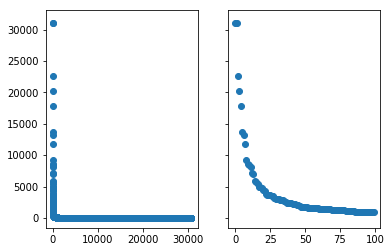

In [49]:
f, axes = plt.subplots(1, 2, sharey=True)

axes[0].scatter(
    list(range(len(train_occurances))),
    list(reversed(sorted(train_occurances.values())))
)
axes[1].scatter(
    list(range(100)),
    list(reversed(sorted(train_occurances.values())))[:100]
)

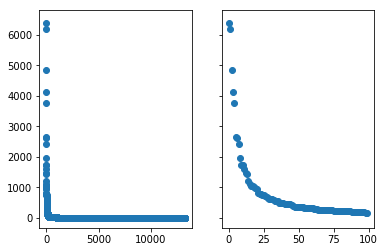

In [50]:
f, axes = plt.subplots(1, 2, sharey=True)

axes[0].scatter(
    list(range(len(test_occurances))),
    list(reversed(sorted(test_occurances.values())))
)
axes[1].scatter(
    list(range(100)),
    list(reversed(sorted(test_occurances.values())))[:100]
)

In [56]:
list(zip(
    list(reversed(sorted(train_occurances.items(), key=lambda k: k[1])))[:25],
    list(reversed(sorted(test_occurances.items(), key=lambda k: k[1])))[:25]
))

[(('the', 31012), ('the', 6379)),
 (('.', 30969), ('.', 6183)),
 ((',', 22593), (',', 4838)),
 (('to', 20233), ('to', 4117)),
 (('and', 17872), ('and', 3758)),
 (('i', 13605), ('a', 2661)),
 (('a', 13129), ('i', 2625)),
 (('of', 11706), ('of', 2423)),
 (('in', 9198), ('in', 1967)),
 (('that', 8634), ('that', 1746)),
 (('you', 8399), ('is', 1744)),
 (('is', 8113), ('you', 1595)),
 (('for', 7229), ('it', 1472)),
 (('it', 6938), ('for', 1433)),
 (('we', 5839), ('we', 1215)),
 (('on', 5698), ('on', 1100)),
 (('with', 5405), ('with', 1045)),
 (('have', 4959), ('was', 1031)),
 (('was', 4949), ('this', 1005)),
 (('this', 4759), ('have', 985)),
 (('be', 4514), ('be', 954)),
 (('are', 4288), ('are', 818)),
 (('not', 3788), ('as', 795)),
 (("'s", 3718), ('not', 789)),
 (('will', 3623), ("'s", 755))]

In [60]:
list(zip(
    list(sorted(train_occurances.items(), key=lambda k: k[1]))[:25],
    list(sorted(test_occurances.items(), key=lambda k: k[1]))[:25]
))

[(('tdy', 1), ('aircraft', 1)),
 (('incidentals', 1), ('d.c.', 1)),
 (('2013.', 1), ('tegucigalpa', 1)),
 (('wholly', 1), ('assault', 1)),
 (('unwelcomed', 1), ('journal', 1)),
 (('swearing-in', 1), ('dedicates', 1)),
 (('gsa', 1), ('attacking', 1)),
 (('statuses', 1), ('connie', 1)),
 (('rakic', 1), ('chorus', 1)),
 (('goran', 1), ('stalwart', 1)),
 (('hadzic', 1), ('ipc', 1)),
 (('frushka', 1), ('moments', 1)),
 (('gora', 1), ('propelled', 1)),
 (('vojvodina', 1), ('debilitating', 1)),
 (('bia', 1), ('destabilized', 1)),
 (('brammertz', 1), ('undermined', 1)),
 (('burce', 1), ('masood', 1)),
 (('warlick', 1), ('dominique', 1)),
 (('+381-11-306-4605', 1), ('strauss-kahn', 1)),
 (('14:30', 1), ('anticipate', 1)),
 (('conrad', 1), ('candid', 1)),
 (('+90', 1), ('newspapers', 1)),
 (('312', 1), ('professionals', 1)),
 (('457', 1), ('oppressive', 1)),
 (('7280', 1), ('reckless', 1))]